<a href="https://colab.research.google.com/github/ahneekgyun/Pytorch_repository/blob/main/pytorch_tutorial_Dataset%2CDataLoader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset , Dataloader

데이터 샘플을 처리하는 일은 지저분 할 수 있다.  
Pytorch는  
torch.utils.data.DataLoader  
torch.utils.data.Dataset  
두 가지 기본 요소를 제공한다.  
Dataset은 샘플과 정답(label)을 저장  
DataLoader는 Dataset을 샘플에 쉽게 접근 할 수 있도록 순회가능한 객체(iterable)로 감싼다.


## 데이터셋 불러오기
Fashion-MNIST



In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 16078693.34it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 272143.65it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5051094.74it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 8026868.77it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



## 데이터셋을 순회하고 시각화하기
Dataset에 list처럼 직접 접근(index)할 수 있다.

In [12]:
training_data[1][0].shape

torch.Size([1, 28, 28])

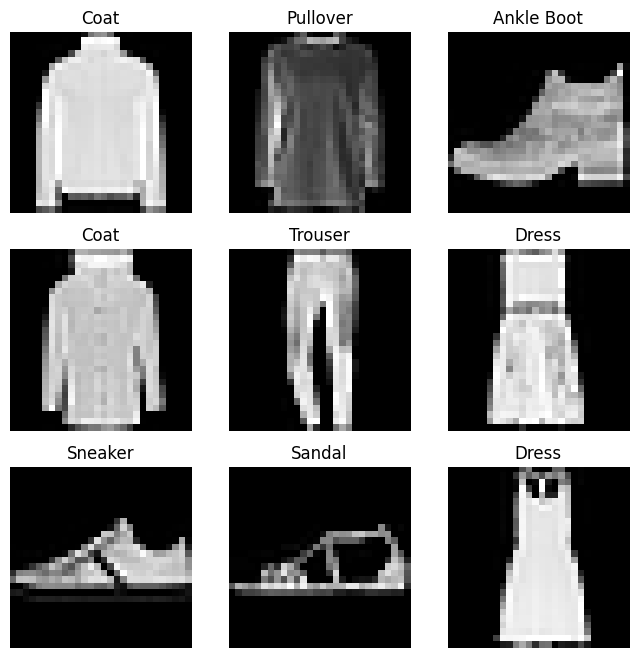

In [4]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

# item() -> 크기가 1인 텐서에서 숫자 값을 파이썬의 기본 숫자 형태로 추출할 때 사

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## 파일에서 사용자 정의 데이터셋 만들기

사용자 정의 Dataset 클래스는 반드시 3개의 함수를 구현해야 한다.

In [14]:
'''
반드시 구현해야 하는 3가지 함수
__init__
__len__
__getitem__

''';

In [15]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
  def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file, names=['file_name', 'label'])
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

  def __len__(self):
    return len(self.img_labels)

  def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
      image = self.transform(image)
    if self.target_transform:
      label = self.target_transform(label)
    return image, label

## DataLoader로 학습용 데이터 준비하기

Dataset은 데이터의 특징을 가져오고 하나의 샘플에 정답을 지정하는 일을 한번에 한다.  
모델을 학습할 때, 일반적으로 샘플들은 미니배치로 전달하고, 에폭마다 섞여 과적합을 막는다.  
DataLoader는 간단한 API로 이런 복잡한 과정들을 추상화한 순회가능한 객체이다.

In [16]:
from torch.utils.data import DataLoader

# shuffle = True로 설정하면 에폭마다 데이터를 섞는다.
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])
img.shape:torch.Size([28, 28])


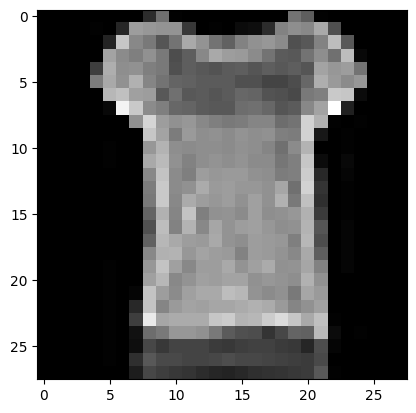

Label: 0


In [23]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

img = train_features[0].squeeze()
print(f'img.shape:{img.shape}')

label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")